In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("out/data.csv")
df['StartTime'] = pd.to_datetime(df['StartTime'])
df.head()

,ID,StartTime,Duration_ns,ConnDuration_ns,DialDuration_ns,DNSDuration_ns,RequestDuration_ns,Status,StatusCode,Error
0,GET /,2025-05-08 10:47:10+02:00,260573792,131802541,128589584,3078334,131250,200 OK,200,NaN
1,GET /anything,2025-05-08 10:47:10+02:00,233513000,115560959,114202375,1254000,151584,200 OK,200,NaN
2,GET /,2025-05-08 10:47:10+02:00,758796167,122792917,119556709,3083750,365500,200 OK,200,NaN
3,PUT /anything,2025-05-08 10:47:10+02:00,407599375,124115583,122359875,1598000,214541,200 OK,200,NaN
4,GET /anything,2025-05-08 10:47:11+02:00,793593250,116428292,114320250,1939958,152834,200 OK,200,NaN


In [9]:
for col in df.columns:
    if col.endswith('_ns'):
        ms_col = col.replace('_ns','_ms')
        df[ms_col] = df[col]/1000000

In [10]:
aggs = {
    col: ['count','mean','std'] for col in df.columns if col.endswith('_ms')
}
df.groupby(['ID','StatusCode']).agg(aggs)

Duration_ms                         ConnDuration_ms  \
                               count        mean         std           count   
ID            StatusCode                                                       
GET /         200                 19  475.419454  298.400292              19   
GET /anything 200                 19  617.961239  392.043331              19   
PUT /anything 200                 18  553.484824  368.348305              18   

                                               DialDuration_ms              \
                                mean       std           count        mean   
ID            StatusCode                                                     
GET /         200         120.139779  5.244336              19  117.829195   
GET /anything 200         119.231331  3.239176              19  117.191428   
PUT /anything 200         118.272197  3.658443              18  116.497176   

                                   DNSDuration_ms                      \
                               std          count      mean       std   
ID            StatusCode                                                
GET /         200         4.988215             19  2.110625  0.447314   
GET /anything 200         3.210894             19  1.854430  0.308223   
PUT /anything 200         3.613433             18  1.617347  0.335948   

                         RequestDuration_ms                      
                                      count      mean       std  
ID            StatusCode                                         
GET /         200                        19  0.196658  0.081164  
GET /anything 200                        19  0.162669  0.027594  
PUT /anything 200                        18  0.148565  0.051098

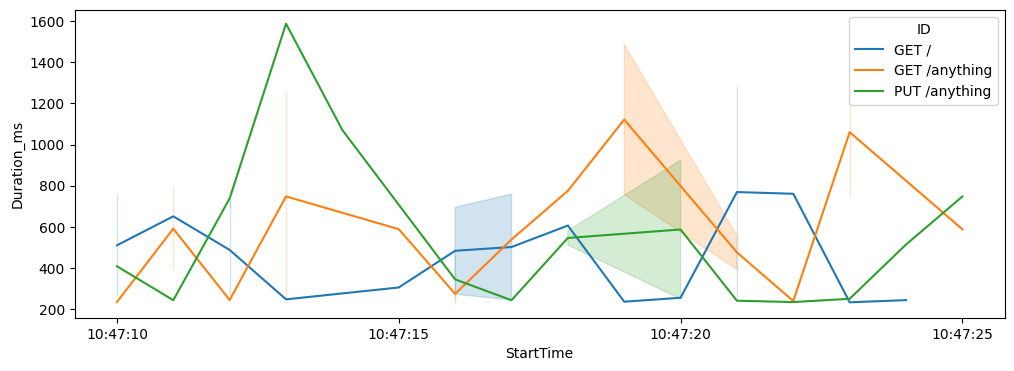

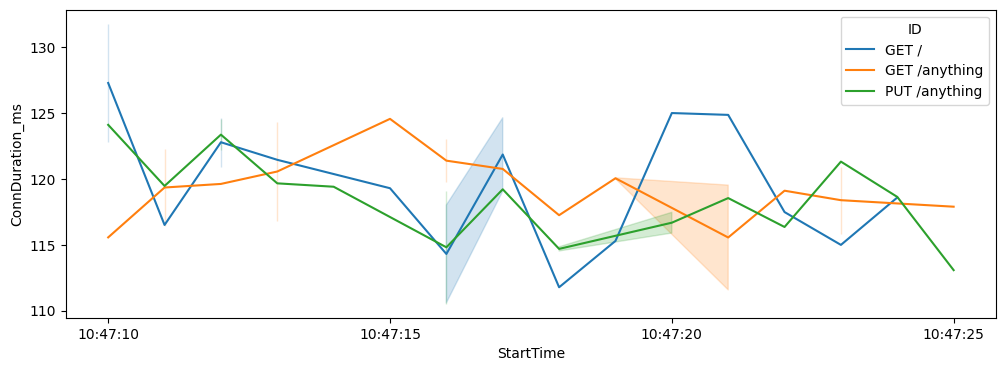

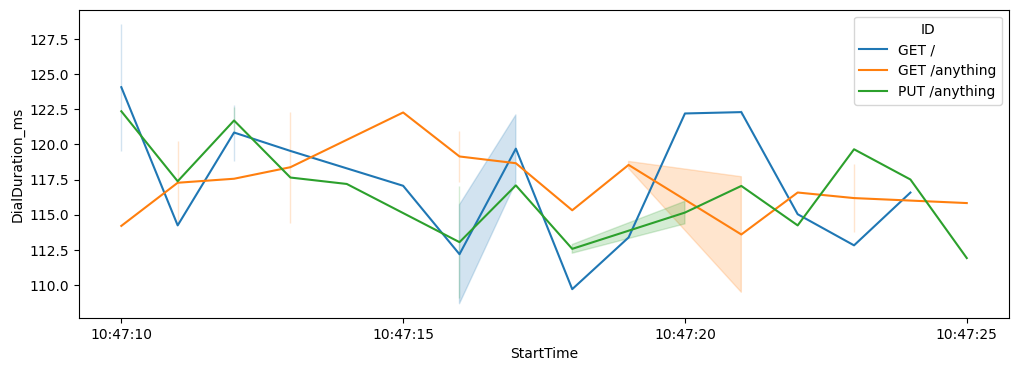

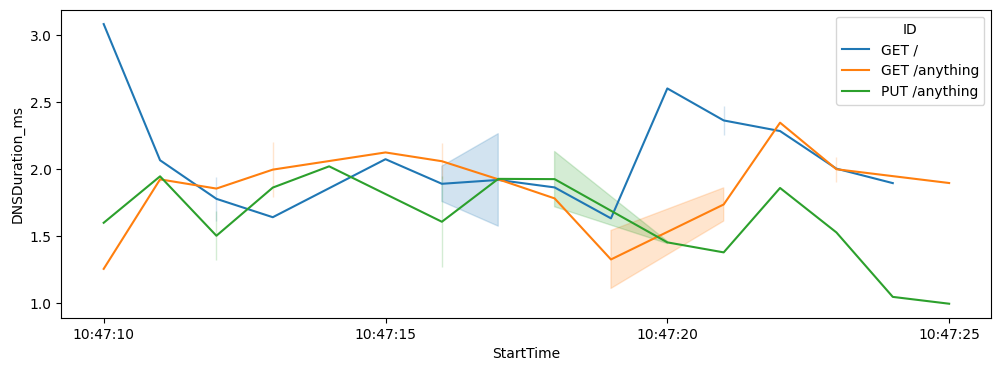

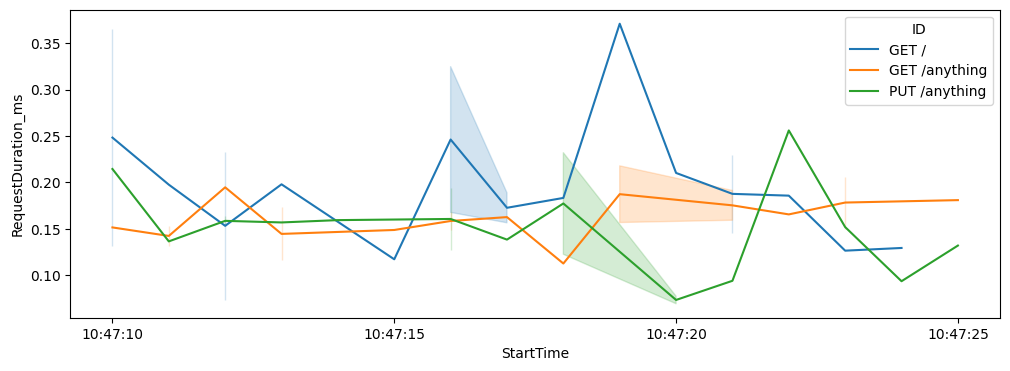

In [11]:
for col in df.columns:
    if col.endswith('_ms'):
        plt.figure(figsize=(12,4))
        sns.lineplot(data=df,x='StartTime',y=col,hue="ID",errorbar='se')
        plt.show()

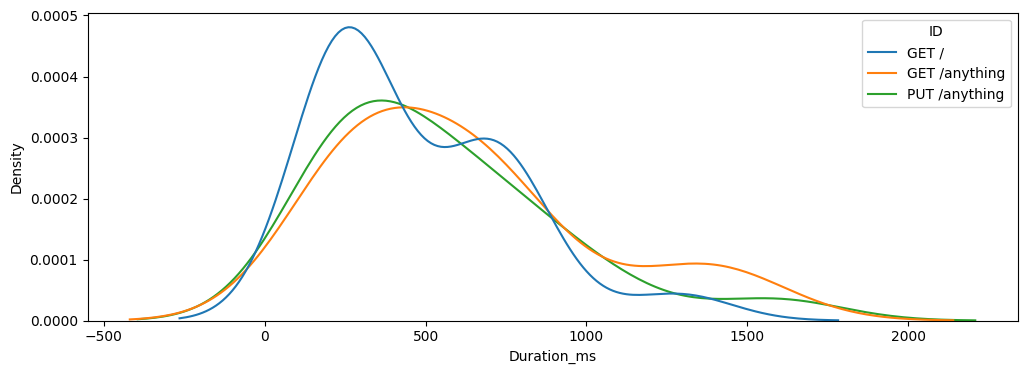

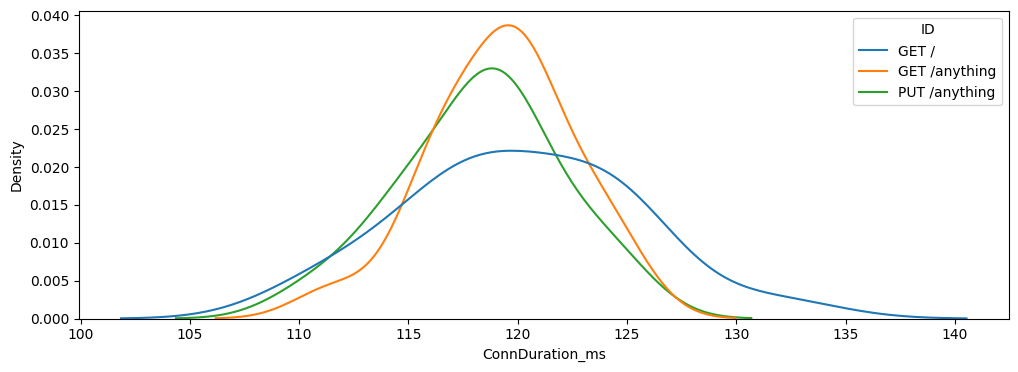

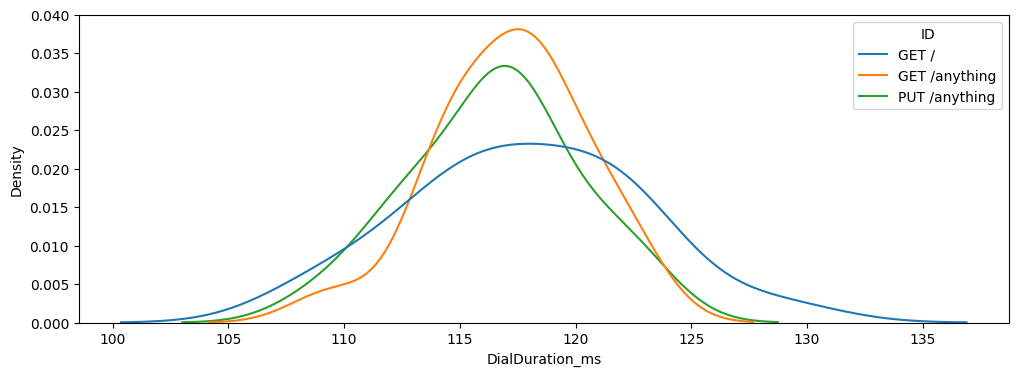

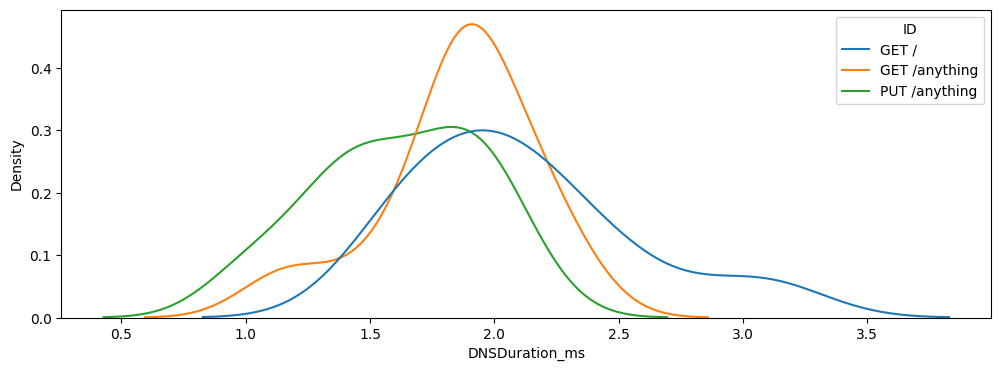

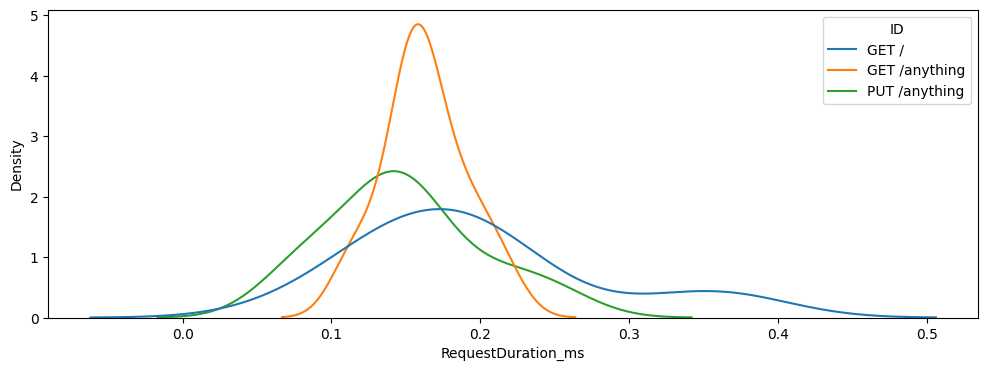

In [12]:
for col in df.columns:
    if col.endswith('_ms'):
        plt.figure(figsize=(12,4))
        sns.kdeplot(data=df,x=col,hue="ID")
        plt.show()